<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Дмитрий, доброго дня! рад приветствовать тебя вновь) <br />
(а дальше шаболонная обязательная часть, как ты заметил по другим спринтам)
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<BR> В ПУТЬ!<br>

## <a id='table of contents'>Содержание</a>  
<a href='#part1'>1. ПОСТАНОВКА ЗАДАЧИ</a>     
<a href='#part2'>2. ЗАГРУЗКА И ОПИСАНИЕ ДАННЫХ</a>    
<a href='#part3'>3. ПРЕДОБРАБОТКА ДАННЫХ</a>    
<a href='#part4'>4. АНАЛИЗ ДАННЫХ </a>   
<a href='#part5'> 5. ОБУЧЕНИЕ МОДЕЛЕЙ</a>      

# <a id='part1'>1. ПОСТАНОВКА ЗАДАЧИ</a>
<a href='#table of contents'>к оглавлению</a>

***Цель:*** Построить модель для прогноза количества заказов такси на следующий час  
***Целевая метрика:*** RMSE, на тестовой выборке должно быть не больше 48

# <a id='part2'> 2. ЗАГРУЗКА И ОПИСАНИЕ ДАННЫХ</a>
<a href='#table of contents'>к оглавлению</a>

In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from sklearn.model_selection import RepeatedKFold
from statsmodels.tsa.seasonal import seasonal_decompose
from catboost import CatBoostRegressor
from catboost import Pool, cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
try:
    df=pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0]) 
except: 
    df=pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0])
df.sort_index(inplace=True)

In [2]:
display(df)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
num_orders    26496 non-null int64
dtypes: int64(1)
memory usage: 414.0 KB
None


Проверим данные на монотонность 

In [4]:
print(df.index.is_monotonic)

True


***Вывод 1:***  
* Пропуски в данных отсутствуют.
* Данные монотонны

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br>ОК, данные на базе)

# <a id='part3'>3. ПРЕДОБРАБОТКА ДАННЫХ </a>
<a href='#table of contents'>к оглавлению</a>

Выведем данные на графике

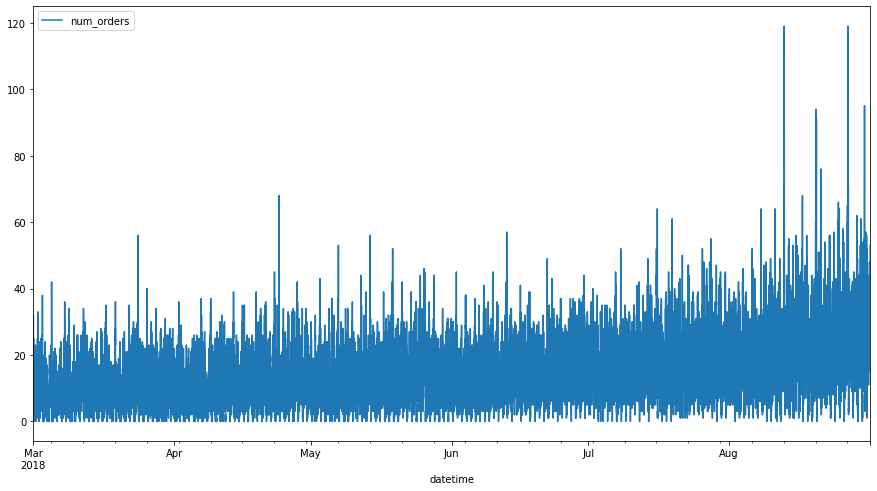

In [5]:
df.plot(figsize=(15,8))

Сделаем ресемплирование по часу с расчетом средних значений

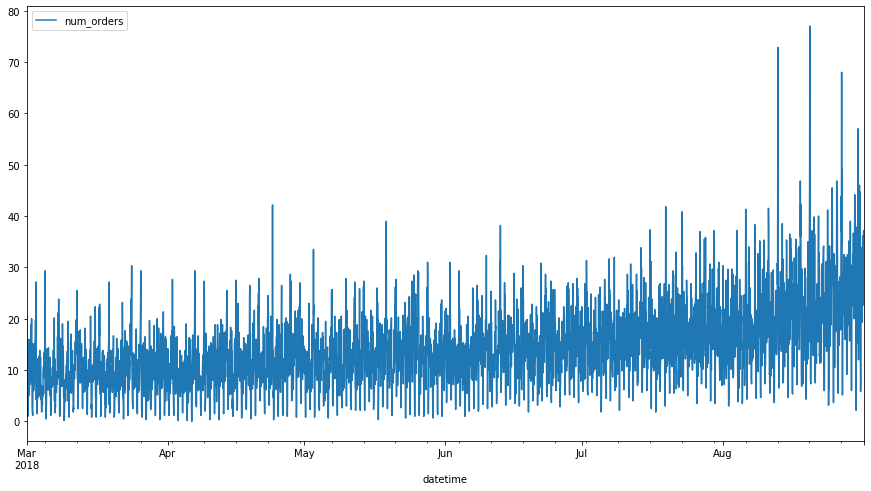

In [6]:
df2=df.resample('1H').mean()
df2.plot(figsize=(15,8))

# <a id='part4'>4. АНАЛИЗ ДАННЫХ </a>
<a href='#table of contents'>к оглавлению</a>

Разложим данные на тренды и сезонность

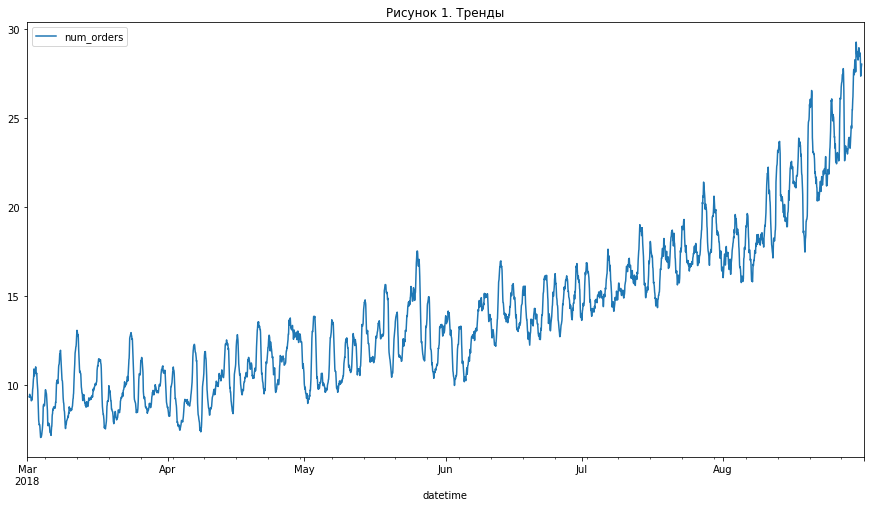

In [7]:
decomposed = seasonal_decompose(df2)
decomposed.trend.plot(figsize=(15,8), title='Рисунок 1. Тренды')

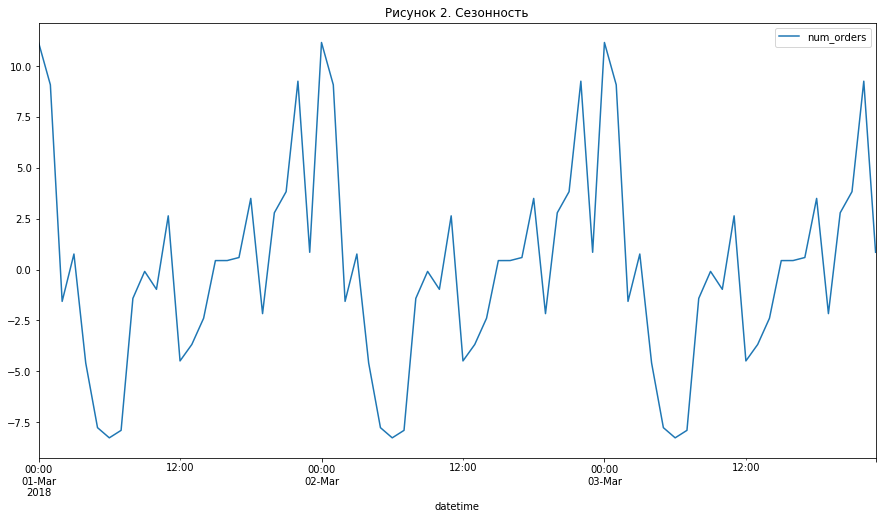

In [8]:
decomposed2=seasonal_decompose(df2['2018-03-01':'2018-03-03'])
decomposed2.seasonal.plot(figsize=(15,8), title='Рисунок 2. Сезонность')

***Вывод 2:***    
* Как видно из рисунка 1 наблюдается тренд на рост числа заказов в летний период  
* Как видно из рисунка 2 наблюдаются колебания спроса в течении суток, с наибольшим спросом в районе 20:00-00:00 и наименьшим в ночное время.  

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Исследование - понятно.<font color='green'><br>
Инструмент декомпозиции в частности, а графический анализ временных рядов как в принципе - очень нужный этап моделирования рядов.<br> Позволяет увидеть продажи визуально, а это очень помогает сделать предвариетльные выводы<br>
    
Хочу озвучить ещё такой момент<br>
Дело в том, в реальности бизнеса есть все три вида сезонности:<br>
1) дневная сезонность есть - ведь данные собраны по дням, т.е. будни и выходные имеют разные продажи<br>
2) внутрисуточная сезонность: когда продажи утром отличаются от продаж вечером <br>
3) месячная сезонность: когда продажи лета и осени - разные.<br><br>
И если строить прогноз на длительный период времени, то без учёта всех видов сезонности  - не обойтись<br>
Например: есть в данных восходящий тренд. Но вопрос такой возникает: <br>
этот подъём действительно за счёт роста компании (чаще всего тренд - это отражение роста компании) или есть ещё влияние месячной сезнности? (летом - продаж в рост, например, и именно этот момент мы наблюдаем в данных)<br>
Ответ на вопрос - не протой на имеющихся данных - у нас данных меньше года. А это означает, что месячную сезонность нам не просто вычислить адекватно - т.е. не внести в модель корректтировки месяцев(<br>
Поэтому, я бы дал такой совет:<br>
на горизонте прогнозирования - несколько часов или дней - можно предположить что у нас тренд.<br>
А если строить прогноз на несколько недель - вот тут утверждать наличие тренда надо с большой осторожностью))))<br><br>
Ну, а если вернуться к постановке задаче - построить прогноз на час (очень маленький горизонт), то двух сезонности может и хватить.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ СТУДЕНТА</u>
</font>
<font color='blue'><br>Я понял, что нельзя говорить о месячных и годовых трендах, если у нас есть данные только за несколько
месяцев

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>ОК)

# <a id='part5'>5 ОБУЧЕНИЕ МОДЕЛЕЙ</a>
<a href='#table of contents'>к оглавлению</a>

***Создание признаков***

Создадим признаки для обучения

In [22]:
df2['dayofweek'] = df2.index.dayofweek
df2['hour']=df2.index.hour
display(df2)

,num_orders,dayofweek,hour,day,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,20.666667,3,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,14.166667,3,1,1,20.666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,11.833333,3,2,1,14.166667,20.666667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,11.000000,3,3,1,11.833333,14.166667,20.666667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,7.166667,3,4,1,11.000000,11.833333,14.166667,20.666667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,22.666667,4,19,31,34.500000,36.166667,32.833333,19.333333,22.166667,27.666667,...,16.500000,38.333333,32.333333,46.000000,41.000000,26.333333,33.000000,23.666667,12.000000,27.904762
2018-08-31 20:00:00,25.666667,4,20,31,22.666667,34.500000,36.166667,32.833333,19.333333,22.166667,...,44.666667,16.500000,38.333333,32.333333,46.000000,41.000000,26.333333,33.000000,23.666667,27.904762
2018-08-31 21:00:00,26.500000,4,21,31,25.666667,22.666667,34.500000,36.166667,32.833333,19.333333,...,13.000000,44.666667,16.500000,38.333333,32.333333,46.000000,41.000000,26.333333,33.000000,27.619048


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Отлично, что не стал ни год, ни месяц как факторы использовать.<br>
На мой взгляд, тут только сезонности можно определить hour и dayofweek. А day - просто послдеовательность чисел в данном проекте)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ СТУДЕНТА</u>
</font>
<font color='blue'><br>А почему это просто числа? Вот непонятно вообще как это все выбирается, нигде это не объяснили.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>Временные ряды - интересная тема) я ниже литературу дам - там можно будет ещё раз всё посмотртеь...

Напишем функцию для создания признаков с отстающими значениями

In [23]:
def make_lag(data, max_lag, rolling_mean_size):
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    data['rolling_mean']=data['num_orders'].shift().rolling(rolling_mean_size).mean()

Дополним таблицу с признаками

In [27]:
make_lag(df2, 2, 24)
display(df2)

,num_orders,dayofweek,hour,day,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,20.666667,3,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,14.166667,3,1,1,20.666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,11.833333,3,2,1,14.166667,20.666667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,11.000000,3,3,1,11.833333,14.166667,20.666667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,7.166667,3,4,1,11.000000,11.833333,14.166667,20.666667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,22.666667,4,19,31,34.500000,36.166667,32.833333,19.333333,22.166667,27.666667,...,16.500000,38.333333,32.333333,46.000000,41.000000,26.333333,33.000000,23.666667,12.000000,27.479167
2018-08-31 20:00:00,25.666667,4,20,31,22.666667,34.500000,36.166667,32.833333,19.333333,22.166667,...,44.666667,16.500000,38.333333,32.333333,46.000000,41.000000,26.333333,33.000000,23.666667,27.923611
2018-08-31 21:00:00,26.500000,4,21,31,25.666667,22.666667,34.500000,36.166667,32.833333,19.333333,...,13.000000,44.666667,16.500000,38.333333,32.333333,46.000000,41.000000,26.333333,33.000000,28.006944


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'>
По факторам 24 и 7:<br>
Lag: его называют ещё параметром авторегрессии. На бытовом уровне его можно понять так: допустим вчера мы собрались с друзьями и не много закусили.... повлияет ли это на сегодняшний настрой на жизнь? Скорее да)))) Так вот с авторегрессией также. Допустим lag=1 - учитывает (для удобства будем считать, что продажи собраны по дням) как вчерашние продажи - вчерашние события - воалияли на сегоняшние.Lag=2: учитывает как позавчерашние продажи влияютна сегодняшние.....<br>
    
Обычно так происходит поиск параметров.<br>
1) узнаём , какая у нас сезонность: в нашем случае их две - часовая и день недели (суточная и недельная)<br>
2) Узнайм, какой у нас тренд. пусть будет пока rolling (24) - сутки<br>
3) строим модель (без лагов).<br>
4) строим график автокорреляции остатков (факт - прогноз). Если видим "зубья" на сезонных лагах: 24, 24*7 - то мы плохо жанной моделью учли сезонность.<br> Если высокий "зуб"(столбец на графике) на на первом лаге, то ндо вводить в модель фактор lag=1.<br> и перестроить модель. И так по кругу.<br><br>
    
По скользящему среднего:<br>
Предположим rolling=10 - скользящее среднее. По сути, ищем среднее по 10 точкам, потом следующие 10 точек, и т.д. - это некое подобие тренда будет - средней линии. Т.е. ты прав - сглаживание колебаний/выбросов. Это легко увидеть на пределе: допустим длина ряда 100 дней. rolling(100) - это просто одно число - среднее всего ряда. <br>
    
Поэтому, если выставить сезонности - hour и деньНедели, то дополнительные факторы могут быть такие: лаг =1 (максимум 2), а скользящее среднее = 24 (среднее за сутки). Т.е. начинать с этого. В итоге модель будет приемлемая по точности и не много факторов.. а это значит и для бизнеса будет легче доносить решение)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ СТУДЕНТА</u>
</font>
<font color='blue'><br> Не понял как строить графики автокорреляции остатков и где должны быть "зубья". Разве этого не должно быть в тренажере? Какой-то бред с этим проектом. В тренажере 2+2=4, а в проекте просят рассчитать тройной интеграл. Я уже написал гневный отзыв по спринту,если что)))

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>Мои комментарии - это дополнительный материал к тренажёру (он весь зелёный)). Т.е.  тренажёр даёт базу. А на неё можно "нанизывать" дополнительную информацию. 

Получим тренировочную и тестовую выборки

In [29]:
train, test = train_test_split(df2, shuffle=False, test_size=.1, random_state=12345)

#удалим пропуски в тренировочных данных
train = train.dropna()

In [30]:
features_train=train.drop(['num_orders'], axis=1)
target_train=train['num_orders']

features_test=test.drop(['num_orders'], axis=1)
target_test=test['num_orders']

Проверим порядок

In [31]:
print(features_train.index.min(), features_train.index.max())
print(features_test.index.min(), features_test.index.max())

2018-03-02 00:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


***Обучение моделей***

Обучим модель линейной регресии 

In [43]:
model=LinearRegression()
model.fit(features_train, target_train)
predict_test=model.predict(features_test)
LinearRegression_test_RMSE=mean_squared_error(target_test, predict_test)
('RMSE для линейной регресси на тестовой выборке', LinearRegression_test_RMSE)
print(predict_test)

[21.29622224 22.51497224 21.46809724 19.00715974 20.91340974 15.71809724
 12.40559724 15.23372224 20.21809724 25.22590974 27.86653474 36.28840974
 48.56965974 24.78840974 23.81965974 16.58528474  9.17903474  8.03840974
 16.35872224 20.75715974 21.72590974 23.31965974 18.85872224 19.62434724
 17.61653474 22.57747224 21.21809724 22.17122224 18.03059724 17.29622224
 16.31965974 19.60872224 18.61653474 20.88997224 24.88215974 33.53840974
 21.56965974 25.86653474 18.96028474 10.68684724 10.38215974 12.85872224
 12.31184724 18.42903474 24.24934724 25.21028474 20.05403474 13.63997224
 13.19465974 19.00715974 21.17122224 26.06965974 19.73372224 15.61653474
 15.56965974 22.11653474 24.74153474 29.48372224 26.96809724 21.41340974
 27.38215974 24.77278474 24.50715974 19.37434724 10.57747224  8.26497224
 17.21809724 22.86653474 23.67122224 20.59309724 17.74153474 17.71028474
 15.69465974 16.10872224 25.94465974 25.86653474 20.68684724 20.42903474
 20.41340974 23.70247224 18.53059724 21.74153474 27

Создадим датафрейм со значениями для линейной регрессии

In [78]:
predict_LinearRegression_test=pd.DataFrame()
predict_LinearRegression_test['Предсказание']=predict_test.tolist()
predict_LinearRegression_test['Фактическое значение']=target_test.tolist()
display(predict_LinearRegression_test)

,Предсказание,Фактическое значение
0,16.038564,17.000000
1,18.752603,29.166667
2,22.629043,24.000000
3,24.340059,25.333333
4,18.366111,17.333333
...,...,...
437,20.516340,22.666667
438,24.654839,25.666667
439,26.150946,26.500000
440,25.215981,37.166667


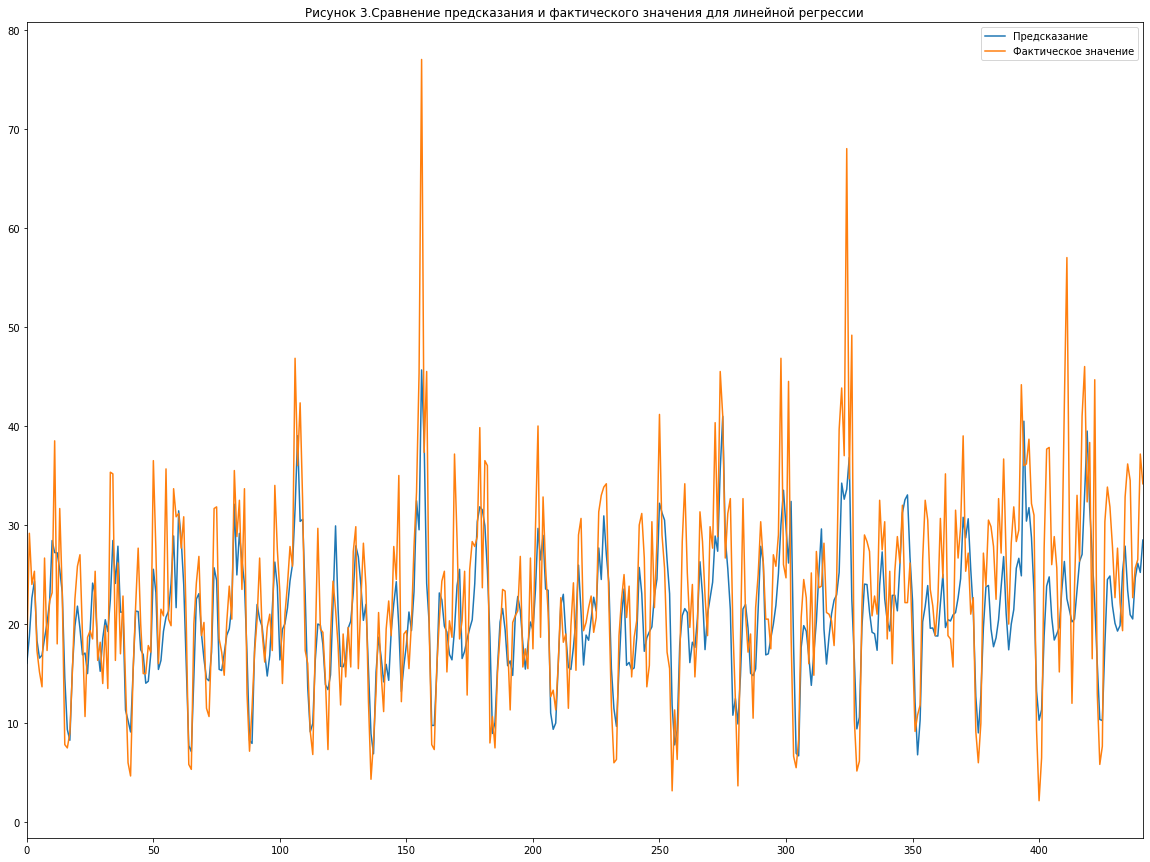

In [87]:
predict_LinearRegression_test.plot(y=['Предсказание', 'Фактическое значение'], 
        figsize=(20,15), title='Рисунок 3.Сравнение предсказания и фактического значения для линейной регрессии')

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ СТУДЕНТА</u>
</font>
<font color='blue'><br> Из графика я вижу, что у реального ряда амплитуда больше, тоесть больше разброс значений, 
а предсказания идут в более узком диапозоне. Но как это поможет мне улучшить модель? Вот вопрос!) 
У меня появилась гипотеза (на основе твоих подсказок), что раз плохо предсказаны высокие значения заказов, которые приходятся на выходные и вечернее время, то нужно добавить в признаки недельную сезонность, а также лаги на 10-12 часов назад от предсказания. Ход мысли в правильном направлении?

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>Тут можно рассуждать в нескольких направениях.<br>
на графике видно, что фактор тренд в конце ряда уже плохо срабатывает. Т.е. модель можно скорректировать  - надо заложить растущий тренд<br>
Другой момент: бывают некие особые продажи..., т.е. резкие выпады в данных. А их не у гадать( т.к. в эти дни были факторы продаж, о которых в истории не было сказано. Или по другому: в эти дни клиенты вели себя по другому, чем раньше. В факторах, которые мы заложили на обучении модели, этой информации нет. поэтому и не угадываем( тут надо смириться. И провести анализ план-факт: выяснить причины расхождения прогноза и фактически продаж и, если надо, скорректировать модель на найденную причину. Т.е. включить причину, как фактор.<br>
Поэтому, отвечая на твой вопрос, скажу так: надо провести анализ остатков - найти закономерности в них и возможно твои предположения окажутся верными.

Обучим модель случайного леса

In [34]:
#создадим словарь с перебираемыми параметрами
parametrs = { 'n_estimators': range (10, 31, 10),
              'max_depth': range (1,6, 2),
              'min_samples_leaf': range (1,4)}

In [39]:
model=RandomForestRegressor(random_state=123)
tscv = TimeSeriesSplit(n_splits=7)
gsearch = GridSearchCV(model, param_grid=parametrs, scoring='neg_mean_squared_error', cv=tscv)
model_fit=grid.fit(features_train, target_train)
best_score=grid.best_score_
print("Лучшее RMSE на тренировочных данных:", abs(best_score)**0.5)
print("Лучшие параметры:", grid.best_params_)

Лучшее RMSE на тренировочных данных: 4.213196906704775
Лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 30}


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='red'><br>
В нашем случае для поиска гиперпараметров сложновато воспользоваться встроенной в grid search cv, потому что она не учитывает, что у нас временной ряд и валидационная часть выборки при каждом разбиении должна быть позже обучающей. Поэтому, лучше воспользоватся методами из sklearn:	<br><br>
split_index = TimeSeriesSplit().split(features_train)	<br><br>
cb_searcher = GridSearchCV(	.....   cv=split_index....)<br>

Или более облегчённый вараинт.<br>
tscv = TimeSeriesSplit(n_splits=7)(надо посмотерть, как подобрать параметр и аргументировать)<br>
gsearch = GridSearchCV(gbm, param_grid=param_set, scoring='neg_mean_squared_error', n_jobs=-1, cv=tscv, verbose=1) 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ СТУДЕНТА</u>
</font>
<font color='blue'><br> Поправил, но как выбрать значение n_splits мне не понятно. Судя по документации это количество
    подвыборок, в обычной кросс-валидации мы берем 3-5 число и вроде как не было объяснения от чего это зависит и как точно выбрать, кроме общего понимания, что чем больше датасет тем больше должно быть значени CV. Во временных рядах какой-то другой
    принцип?

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u>
</font>
<font color='green'><br>
n_splits , обычно, задают так, чтобы размер валидационной выборки при проведении кросс-валидации примерно совпадал с размером тестовой выборки. Размер тестовой выборки у нас 10%, а размер валидационной равен 1/(n_splits+1) части от обучающей выборки (см. документацию к TimeSeriesSplit). К примеру, если n_splits=2, то размер валидационной равен 1/3 от обучающей выборки, т.е. 1/3*90%=30% от исходной выборки.<br>
  
Возможно, что n_splits=8, то 1/9*90%=10%  - будет более точное попадание.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ СТУДЕНТА 2</u>
</font>
<font color='blue'><br> Спасибо за исчерпывающий ответ, все по полочкам!

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 3</u></b>
</font>
<font color='green'><br>
ОК)

In [98]:
model=RandomForestRegressor(random_state=123, max_depth=5, min_samples_leaf=3, n_estimators=30)
model.fit(features_test, target_test)
predict_test_RandomForest=model.predict(features_test)
RandomForestRegressor_test_RMSE=mean_squared_error(target_test, predict_test_RandomForest)
('RMSE для случаного леса на тестовой выборке', RandomForestRegressor_test_RMSE)

('RMSE для случаного леса на тестовой выборке', 24.827527817989505)

Создадим датафрейм со значениями для случайного леса

In [91]:
predict_RandomForestRegressor_test=pd.DataFrame()
predict_RandomForestRegressor_test['Предсказание']=predict_test_RandomForest.tolist()
predict_RandomForestRegressor_test['Фактическое значение']=target_test.tolist()
display(predict_RandomForestRegressor_test)

,Предсказание,Фактическое значение
0,18.739652,17.000000
1,25.203988,29.166667
2,25.529970,24.000000
3,23.792937,25.333333
4,17.622112,17.333333
...,...,...
437,21.304873,22.666667
438,26.474003,25.666667
439,26.821575,26.500000
440,28.815784,37.166667


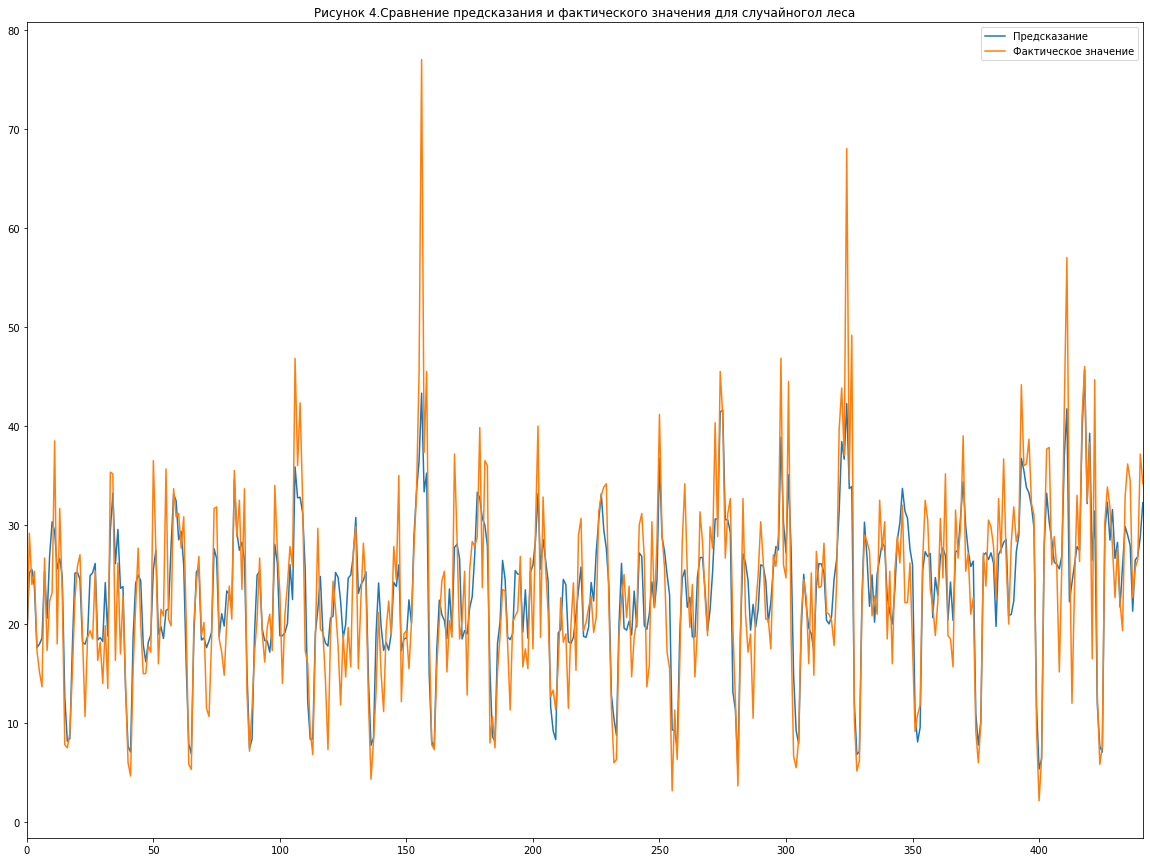

In [92]:
predict_RandomForestRegressor_test.plot(y=['Предсказание', 'Фактическое значение'], 
        figsize=(20,15), title='Рисунок 4.Сравнение предсказания и фактического значения для случайногол леса')

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ СТУДЕНТА</u>
</font>
<font color='blue'><br> График описан лучше, амплитуда предсказаний увеличилась, но наблюдается жудкое переобучение. 
Если посмотреть на значения RMSE на тренировочной и тестовой выборках разница в несколько раз. И что с этим делать? 
Не использовать случайный лес для предcказания или сильнее сглаживать ряд?
Мне кажется, что если сильно сгладить ряд, то переобучение будет меньше или я не прав и нужно менять количество лагов? 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>
навреное, как раз выше об этом и писал - провести анализ остатков. А то, что метрика на тесте выше - это как раз влияние факторов, которых не было в обучении. (тут ни ода модель не справится, если не "поймать" тренд на тестовой выборке)

Обучим модель градиентного бустинга

In [105]:
model = CatBoostRegressor(loss_function="RMSE",  depth=7, random_state=123)
model.fit(features_train, target_train, verbose=False)
predict_test_CatBoostRegressor=model.predict(features_test)
CatBoostRegressor_test_RMSE=mean_squared_error(target_test, predict_test_CatBoostRegressor)
('RMSE для градиентного бустинга на тестовой выборке', CatBoostRegressor_test_RMSE)

('RMSE для градиентного бустинга на тестовой выборке', 46.909901151547764)

Создадим датафрейм со значениями для градиентного бустинга

In [106]:
predict_CatBoostRegressor_test=pd.DataFrame()
predict_CatBoostRegressor_test['Предсказание']=predict_test_CatBoostRegressor.tolist()
predict_CatBoostRegressor_test['Фактическое значение']=target_test.tolist()
display(predict_CatBoostRegressor_test)

,Предсказание,Фактическое значение
0,16.038564,17.000000
1,18.752603,29.166667
2,22.629043,24.000000
3,24.340059,25.333333
4,18.366111,17.333333
...,...,...
437,20.516340,22.666667
438,24.654839,25.666667
439,26.150946,26.500000
440,25.215981,37.166667


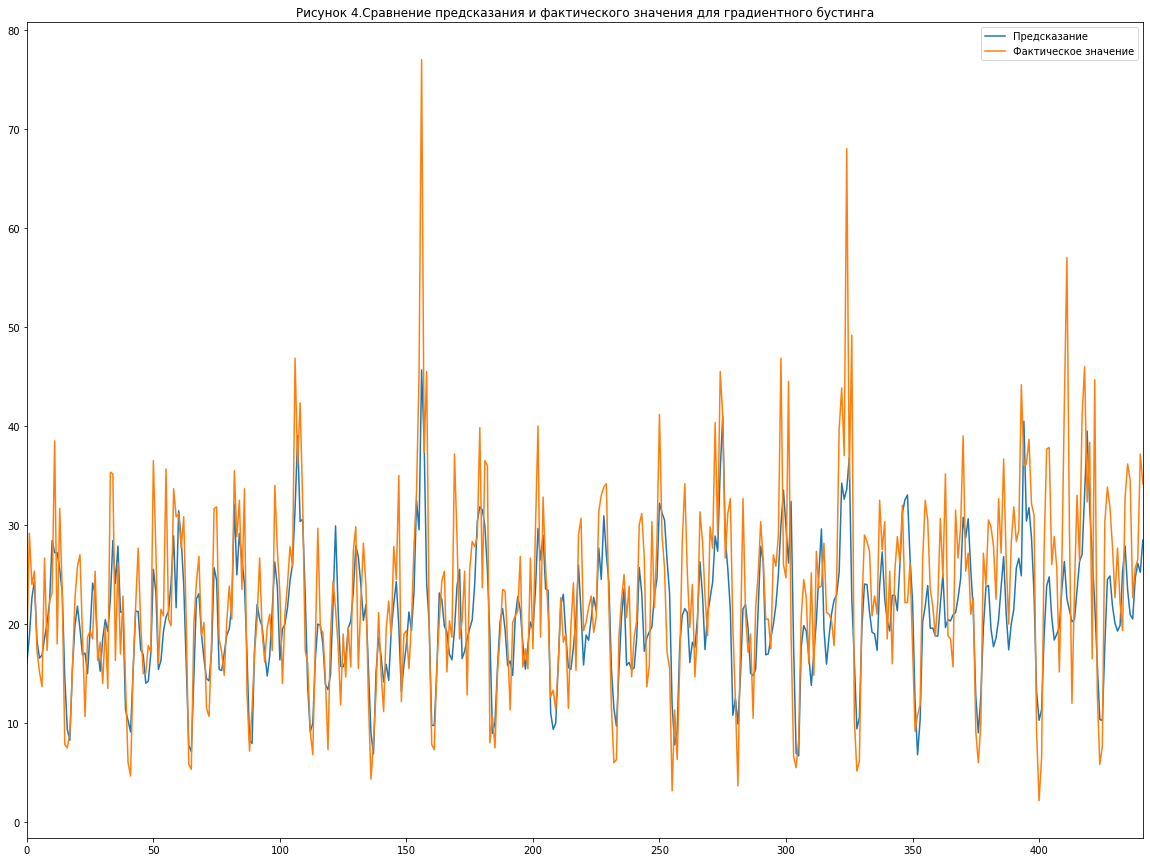

In [107]:
predict_CatBoostRegressor_test.plot(y=['Предсказание', 'Фактическое значение'], 
        figsize=(20,15), title='Рисунок 4.Сравнение предсказания и фактического значения для градиентного бустинга')

In [20]:
data = {'Модель,': ['Линейная регрессия', 'Случайный лес','Градиентный бустинг CatBoost'], 
        'RMSE на тестовой выборке': [LinearRegression_test_RMSE, RandomForestRegressor_test_RMSE, 
                                     CatBoostRegressor_test_RMSE]}
table= pd.DataFrame.from_dict(data)
print('Таблица 1. Сравнение качества предсказания моделей')
display(table)

Таблица 1. Сравнение качества предсказания моделей


,"Модель,",RMSE на тестовой выборке
0,Линейная регрессия,56.647707
1,Случайный лес,25.199386
2,Градиентный бустинг CatBoost,44.635171


***ОСНОВНОЙ ВЫВОД***  
* Лучший скор показала модель случайного леса, на втором месте градиентный бустинг, хуже всего предсказания у линейной регрессии. 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ СТУДЕНТА</u>
</font>
<font color='blue'><br> Судя по всем графикам плохо предсказываются большие значения по вызовам такси, а большие значения у нас:
    - В вечернее время с 20:00 - 24:00;
    - В пятницу-субботу 
Тоесть нужно добавить в модель признаки, которые значимо отражают эту информацию из ряда. Отсюда вопрос каким образом эту
информацию из ряда вытащить? Тоесть какие признаки нужно создать, чтобы они отражали эти изменения ряда? 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>
Если есть подозрение вот на эти признакки, что ты пишешь, то их можно учесть так. Во-первых, посмоетрть, что "зашито" в питоне по этому вопросу: там должны быть части суток уже обозначенные какими-либо функциями. Во-вторых, если там подходящей нет, то создадим сами: допустим, хотим пометить вечерние часы с 20-00 до 24-00 отдельным фактором. Тогда создаём столбец новый. Где помечаем 1- указанные часы, 0 - все остальные. Этот фактор используем в модели.<br>
    
    
ДМИТРИЙ, ПОСМОТРИ, ПОЖАЛУЙСТА: ПОСТАРАЛСЯ ОТВЕТИТЬ НА ТВОИ ВОПРОСЫ. УДАЛОСЬ ЛИ МНЕ? ИЛИ ОСТАЛИСЬ ЕЩЁ?

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ СТУДЕНТА 2</u>
</font>
<font color='blue'><br> Привет, Николай! Да, в общих чертах мне все понятно, но если пришлешь 
литературу, видео или статью (можно на английском, это не проблема), как провести анализ остатков, то
будет вообще супер! Спасибо большое за участие) 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 3</u></b>
</font>
<font color='green'><br>ОК, спасибо) Ниже некоторая литература. А ещё ниже - картинка основных свойств остатков: гистограмма (должны быть чистыми случайными), график скатерплот: остактки/прогнозная модель - разброс остатков должен быть постоянный на всём протяжении модели. И график автокорреляций - не должно быть значимых столбцов.<br>

Тут много ещё что хотелось бы сказать по этой теме...<br>
Если будет возможность тебе однозначно интересно посмотреть разные практические истории вот здесь:<br>
https://ibf.org/knowledge - заморский институт бизнес-прогнозирования.<br>
Там и статьи можно накопать, и методы посмомтерть...<br>

Есть классический труд (он НЕ ML, а исключительно на эксель). Но для понимания сути временных рядов - то, что надо:<br>
УИЧЕРН "Бизнес-прогнозирование"<br>

Идеологически по системе прогнозирования, интересно почитать<br>
ТОМАС УОЛЛАС, Р. СТАЛЬ "планирование продаж и операций" SO&P<br><br>     

Спасибо) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБЧЕНИЯ!

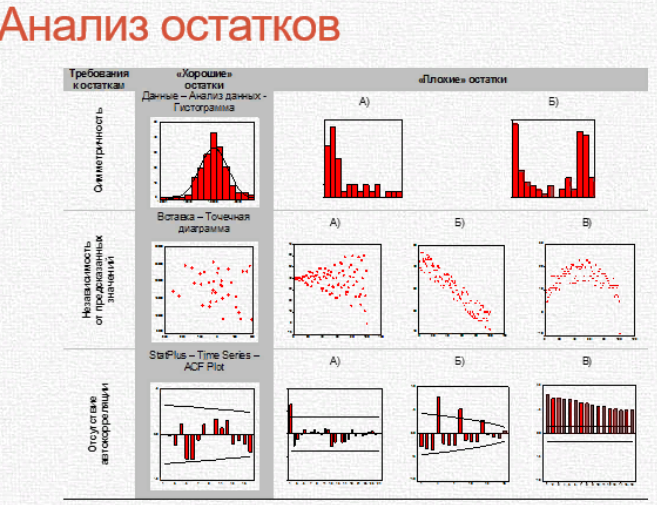

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br>
Дмитрий, с модельной частью справился хорошо!<br>
Видно, что этот скил уже достаточно сильный у тебя.<br>
Метрика - ОК. Но не понятно, если честно, а хороша ли эта модель в плане предсказания? Для этого лучше построить дополнительно график (чуть ниженаписал об этом).<br>
    
И если сутейно рассуждать, то временные ряды стоят особняком во всём курсе, я бы сказал. Тут чуть иная модельная философия, на мой взгляд. Имменно поэтому позволял себе оставлять большие комментарии, чтобы как-то раскрыть её особенности.<br>
    
Уверен, что сумев понять главную особенность временных рядов - составляющие ряда и их влияние на прогноз продаж, у тебя появится ещё более уверенный скил и по этой теме.<br>
Оставил несколько комментариев в тексте - готов буду ответить на твои вопросы!<br>
<font color='red'>    
А пока попрошу тебя чуть скорректировать такие моменты:<br>
Выведи, пожалуйста графики факт/предсказанное на одном рисунке (обычный линейный график). Чтобы увидеть где основные не "попадалки" модели. Это один из важнейших инструментов анализа результатов моделирования временных рядов.<br>
Лучше выбрать масштаб, скажем, несколько дней, чтобы увиеть можо было и сравнить каждый час.<br>    
<font color='green'>
Спасибо)<BR>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br>
Хотел бы оставить несколько идей для твоих будущих проектов в этой обоасти<br>

На мой взгляд, в этой теме (временные ряды) главное - необходимо чувствовать исходный ряд продаж, с точки зрения бизнеса, и уже только потом подбирать к нему модели. Каждое колебание временного ряда - это деньги для бизнеса (если говорим что заказчик бизнесовый) и за "трепетами" данных прячутся разные семейства причин. И именно знание их помогут строить хорошие прогнозы..<br>.
Леса, бустинги, регрессии.... могут подобрать хорошие модели на старых данных. Но иногда, как прогноз эти, модели могут оказаться пустышками - не интересными бизнесу. <br>  <br>
Поэтому, от себя позволю добавить несколько идей:<br>
Очень часто ищут "волшебную таблетку" или "кнопку". Нажал и само всё построилось с высокой точностью<br>
Но такого никогода не будет)))<br>
И причиной тому: модели нужно подсказать причины, по которым происходит колебания продаж (временного ряда): понимать причины колебаний треда, понимать аномалии, учитывать акционные продажи, видеть действия конкурентов , закладывать их в модель и т.д. <br><br>
В общем, всё как обычно - три группы факторов: <br>
1)внешние факторы (например выручка такси-компании зависит от количества машин на линии),<br>
2)есть факторы внутри самих данных (Вы использовали как раз поняти лаг, сезонности), <br>
3)есть параметры самих моделей (то, что обычно используется при моделировании леса или деревьев).<br><br>

Ещё важно иметь ввиду горизонт прогноза: на кокой период строить прогноз нужно  - на час вперёд, на неделю, на месяц.<br>
Это также накладывает ограничения на подбор моделей<br>
Я бы рекомендовал Вам составить для себя матрицу  в разрезе: <br>
а)есть тренд/нет тренда; <br>
б)еть сезоннотсь/нет сезонности; <br>
в)какой горизонт прогноза требуется; <br>
г) есть ли у нас дополнительные факторы для модей<br>
На пересечении знаний о моделях легко будет подобрать адкватную модель.
Не все задачи прогнозирования временных рядов можно хорошо решить лесом и еже с ним на основе знаний только факторов ряда... Они хорошо подойдут для коротких горизонтов прогнозирования.... А если горизонт чуть больше: недели, месяцы... то тут надо подключать понимания фаткоров продаж самого бизнеса.